# Прогнозирование оттока клиентов в сети отелей «Как в гостях»

### Шаг 1. Откройте файлы с данными

In [373]:
# Импортируем библиотеки

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score

In [340]:
# Читаем файл csv

data_train = pd.read_csv('/Users/danil/Desktop/Data Science/Яндекс Практикум Data Science/7/[Boominfo.org] ЯП Специалист дата .часть 7-16 (2022)/02 Сборный Проект — 2/hotel_train.csv')
data_test = pd.read_csv('/Users/danil/Desktop/Data Science/Яндекс Практикум Data Science/7/[Boominfo.org] ЯП Специалист дата .часть 7-16 (2022)/02 Сборный Проект — 2/hotel_test.csv')

### Шаг 2. Предобработка и исследовательский анализ данных

In [341]:
# Посмотрим информацию о данных

data_list = [data_train, data_test]
name_data_list = ['Таблица с тренировочными данными', 'Таблица с тестовыми данными']

for i, j in zip(data_list, name_data_list):
    print(j)
    display(i.head())
    print()
    print('Информация о таблице')
    print()
    display(i.info())
    print()
    print('Колличество пропусков:')
    print()
    display(i.isna().sum())
    print()
    print('Колличество дубликатов:', i.duplicated().sum())
    print()
    print('Колличество уникальных значений:')
    print()
    display(i.nunique())

Таблица с тренировочными данными


,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0,0,7.0,2015,July,27,1,0,1,1.0,...,0,0,0,A,0,0,Transient,0,0,1
1,1,0,14.0,2015,July,27,1,0,2,2.0,...,0,0,0,A,0,0,Transient,0,1,2
2,2,0,0.0,2015,July,27,1,0,2,2.0,...,0,0,0,C,0,0,Transient,0,0,2
3,3,0,9.0,2015,July,27,1,0,2,2.0,...,0,0,0,C,0,0,Transient,0,1,2
4,4,1,85.0,2015,July,27,1,0,3,2.0,...,0,0,0,A,0,0,Transient,0,1,3



Информация о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65229 non-null  int64  
 1   is_canceled                     65229 non-null  int64  
 2   lead_time                       65229 non-null  float64
 3   arrival_date_year               65229 non-null  int64  
 4   arrival_date_month              65229 non-null  object 
 5   arrival_date_week_number        65229 non-null  int64  
 6   arrival_date_day_of_month       65229 non-null  int64  
 7   stays_in_weekend_nights         65229 non-null  int64  
 8   stays_in_week_nights            65229 non-null  int64  
 9   adults                          65229 non-null  float64
 10  children                        65229 non-null  float64
 11  babies                          65229 non-null  float64
 12  meal     

None


Колличество пропусков:



id                                0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
booking_changes                   0
days_in_waiting_list              0
customer_type                     0
required_car_parking_spaces       0
total_of_special_requests         0
total_nights                      0
dtype: int64


Колличество дубликатов: 0

Колличество уникальных значений:



id                                65229
is_canceled                           2
lead_time                           369
arrival_date_year                     2
arrival_date_month                   12
arrival_date_week_number             53
arrival_date_day_of_month            31
stays_in_weekend_nights               5
stays_in_week_nights                  7
adults                                5
children                              4
babies                                5
meal                                  5
country                             155
distribution_channel                  4
is_repeated_guest                     2
previous_cancellations               15
previous_bookings_not_canceled       58
reserved_room_type                    7
booking_changes                      16
days_in_waiting_list                 97
customer_type                         4
required_car_parking_spaces           4
total_of_special_requests             6
total_nights                         10


Таблица с тестовыми данными


,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,6086,1,74.0,2017,January,1,1,1,0,2.0,...,0,0,0,A,0,0,Transient,0,0,1
1,6087,1,62.0,2017,January,1,1,2,2,2.0,...,0,0,0,A,0,0,Transient,0,1,4
2,6088,1,62.0,2017,January,1,1,2,2,2.0,...,0,0,0,A,0,0,Transient,0,1,4
3,6089,1,71.0,2017,January,1,1,2,2,1.0,...,0,0,0,A,0,0,Transient,0,1,4
4,6090,1,172.0,2017,January,1,1,2,5,2.0,...,0,0,0,A,0,0,Transient,0,0,7



Информация о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              32412 non-null  int64  
 1   is_canceled                     32412 non-null  int64  
 2   lead_time                       32412 non-null  float64
 3   arrival_date_year               32412 non-null  int64  
 4   arrival_date_month              32412 non-null  object 
 5   arrival_date_week_number        32412 non-null  int64  
 6   arrival_date_day_of_month       32412 non-null  int64  
 7   stays_in_weekend_nights         32412 non-null  int64  
 8   stays_in_week_nights            32412 non-null  int64  
 9   adults                          32412 non-null  float64
 10  children                        32412 non-null  float64
 11  babies                          32412 non-null  float64
 12  meal     

None


Колличество пропусков:



id                                0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
booking_changes                   0
days_in_waiting_list              0
customer_type                     0
required_car_parking_spaces       0
total_of_special_requests         0
total_nights                      0
dtype: int64


Колличество дубликатов: 0

Колличество уникальных значений:



id                                32412
is_canceled                           2
lead_time                           368
arrival_date_year                     1
arrival_date_month                    8
arrival_date_week_number             35
arrival_date_day_of_month            31
stays_in_weekend_nights               5
stays_in_week_nights                  7
adults                                5
children                              4
babies                                3
meal                                  5
country                             143
distribution_channel                  4
is_repeated_guest                     2
previous_cancellations                7
previous_bookings_not_canceled       46
reserved_room_type                    7
booking_changes                      15
days_in_waiting_list                 75
customer_type                         4
required_car_parking_spaces           5
total_of_special_requests             6
total_nights                         10


In [342]:
# Напечатаем список уникальных значений в столбце country

data_train['country'].sort_values().unique().tolist()

['ABW',
 'AGO',
 'ALB',
 'AND',
 'ARE',
 'ARG',
 'ARM',
 'ATA',
 'AUS',
 'AUT',
 'AZE',
 'BDI',
 'BEL',
 'BEN',
 'BFA',
 'BGD',
 'BGR',
 'BHR',
 'BIH',
 'BLR',
 'BOL',
 'BRA',
 'BRB',
 'BWA',
 'CHE',
 'CHL',
 'CHN',
 'CIV',
 'CMR',
 'CN',
 'COL',
 'CPV',
 'CRI',
 'CUB',
 'CYM',
 'CYP',
 'CZE',
 'DEU',
 'DMA',
 'DNK',
 'DOM',
 'DZA',
 'ECU',
 'EGY',
 'ESP',
 'EST',
 'ETH',
 'FIN',
 'FRA',
 'GAB',
 'GBR',
 'GEO',
 'GGY',
 'GIB',
 'GLP',
 'GNB',
 'GRC',
 'GUY',
 'HKG',
 'HND',
 'HRV',
 'HUN',
 'IDN',
 'IMN',
 'IND',
 'IRL',
 'IRN',
 'IRQ',
 'ISL',
 'ISR',
 'ITA',
 'JAM',
 'JEY',
 'JOR',
 'JPN',
 'KAZ',
 'KEN',
 'KHM',
 'KNA',
 'KOR',
 'KWT',
 'LBN',
 'LBY',
 'LCA',
 'LIE',
 'LKA',
 'LTU',
 'LUX',
 'LVA',
 'MAC',
 'MAR',
 'MCO',
 'MDV',
 'MEX',
 'MKD',
 'MLI',
 'MLT',
 'MMR',
 'MNE',
 'MOZ',
 'MUS',
 'MWI',
 'MYS',
 'NAM',
 'NGA',
 'NIC',
 'NLD',
 'NOR',
 'NZL',
 'OMN',
 'PAK',
 'PAN',
 'PER',
 'PHL',
 'PLW',
 'POL',
 'PRI',
 'PRT',
 'PRY',
 'PYF',
 'QAT',
 'ROU',
 'RUS',
 'RWA',
 'SAU',
 

Таблица с тренировочными данными

0    0.631391
1    0.368609
Name: is_canceled, dtype: float64


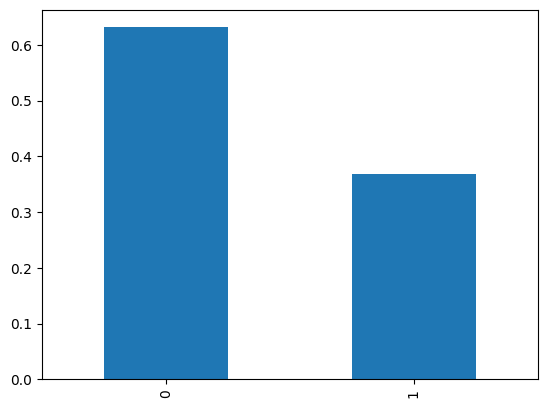

Таблица с тестовыми данными

0    0.611533
1    0.388467
Name: is_canceled, dtype: float64


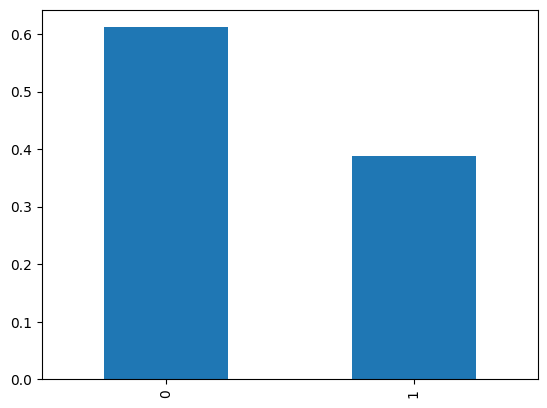

In [343]:
# Выведем баланс классов

for i, j in zip(data_list, name_data_list):
    print(j)
    print()
    class_frequency = i['is_canceled'].value_counts(normalize=True)
    print(class_frequency)
    class_frequency.plot(kind='bar')
    plt.show()

Таблица с тренировочными данными


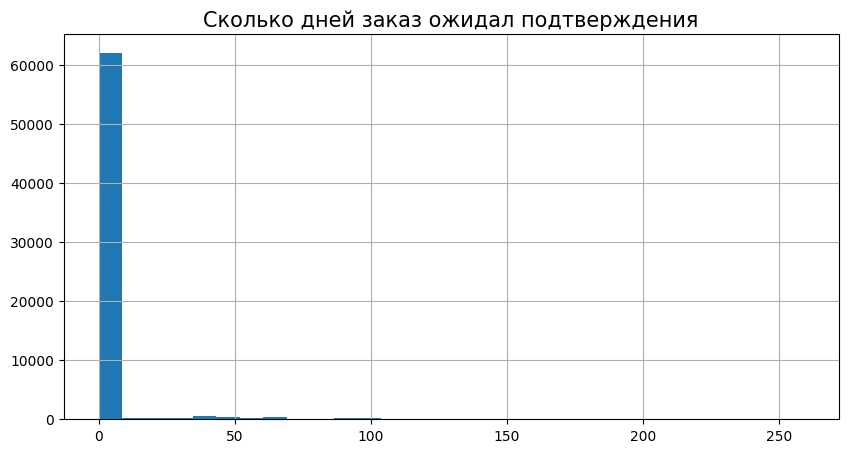

count    65229.000000
mean         3.334422
std         18.239606
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        259.000000
Name: days_in_waiting_list, dtype: float64


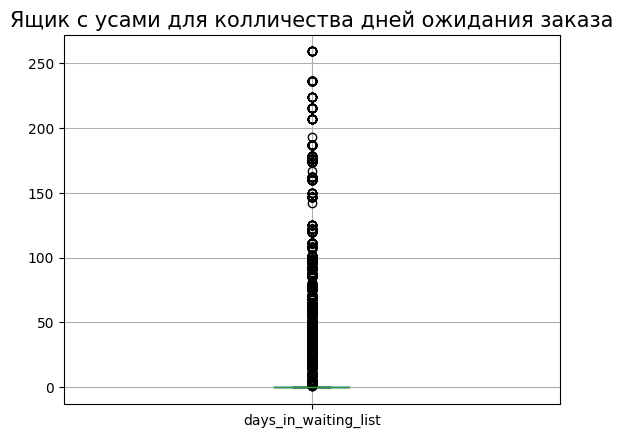

Таблица с тестовыми данными


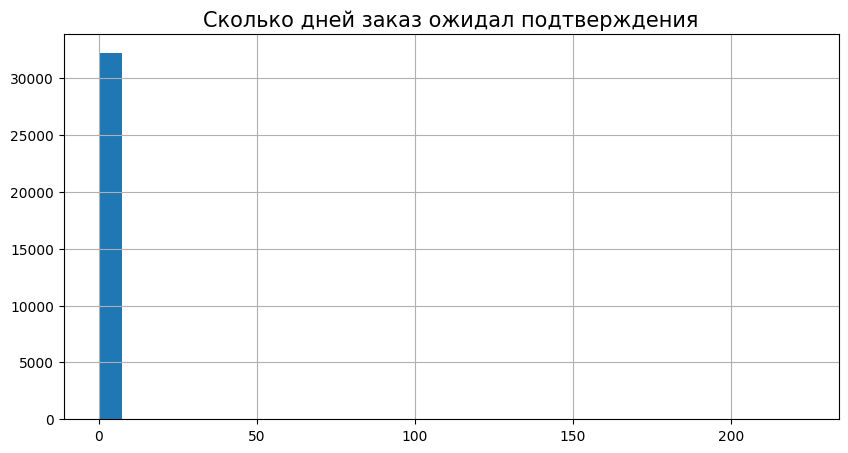

count    65229.000000
mean         3.334422
std         18.239606
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        259.000000
Name: days_in_waiting_list, dtype: float64


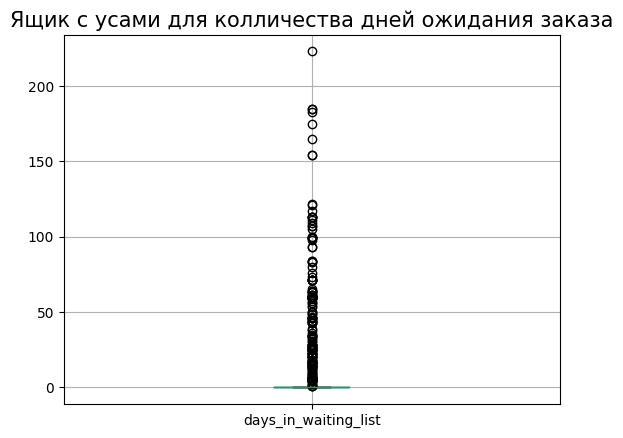

In [344]:
# Построим графики колличества дней ожидания заказа

for i, j in zip(data_list, name_data_list):
    print(j)
    range_max = i['days_in_waiting_list'].max()
    range_min = i['days_in_waiting_list'].min()
    i['days_in_waiting_list'].hist(bins=30, range=(range_min, range_max), figsize=(10,5))
    plt.title('Cколько дней заказ ожидал подтверждения', fontsize=15)
    plt.show()
    print(data_train['days_in_waiting_list'].describe())

    i.boxplot(column='days_in_waiting_list') 
    plt.title('Ящик с усами для колличества дней ожидания заказа', fontsize=15)
    plt.show()

In [345]:
for i, j in zip(data_list, name_data_list):
    print('Года заезда.', j)
    print(i['arrival_date_year'].unique())

Года заезда. Таблица с тренировочными данными
[2015 2016]
Года заезда. Таблица с тестовыми данными
[2017]


In [346]:
# Удаляем в обеих таблицах строки, 
# в которых в столбце days_in_waiting_list значение больше 1

for i in data_list:
    i.drop(i.loc[i['days_in_waiting_list'] > 1].index, inplace=True)
    i.drop(['id', 'arrival_date_year'], axis=1, inplace=True)
    i.reset_index(drop=True, inplace=True)

In [347]:
# Ищем пробелы в значениях стобцов типа 'object'

object_list = ['arrival_date_month', 'meal', 
               'country', 'distribution_channel', 
               'reserved_room_type', 'customer_type']

for i, j in zip(data_list, name_data_list):
    print(j)
    print()
    for k in object_list:
        print(k)
        print(i[k].unique())
        print()

Таблица с тренировочными данными

arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

meal
['BB       ' 'FB       ' 'HB       ' 'SC       ' 'SC']

country
['GBR' 'PRT' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'USA' 'DEU' 'BEL' 'CHE' 'CN'
 'GRC' 'NLD' 'ARG' 'RUS' 'SWE' 'POL' 'EST' 'CZE' 'ITA' 'FIN' 'DNK' 'MOZ'
 'BWA' 'LUX' 'BRA' 'SVN' 'ALB' 'CHN' 'MEX' 'MAR' 'SMR' 'LVA' 'CHL' 'AUT'
 'LTU' 'TUR' 'ISR' 'IND' 'CYM' 'AUS' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN'
 'TUN' 'ARE' 'HRV' 'HKG' 'IRN' 'GIB' 'JEY' 'URY' 'ZAF' 'COL' 'GGY' 'KWT'
 'CYP' 'KAZ' 'THA' 'DOM' 'NGA' 'BLR' 'VEN' 'UKR' 'ARM' 'JPN' 'LKA' 'MYS'
 'BIH' 'MUS' 'OMN' 'SUR' 'JAM' 'BGR' 'CIV' 'SRB' 'JOR' 'SYR' 'PHL' 'PRI'
 'SGP' 'BDI' 'LBN' 'AGO' 'VNM' 'AZE' 'PLW' 'NZL' 'EGY' 'MDV' 'CMR' 'MLT'
 'SVK' 'MWI' 'STP' 'TWN' 'IDN' 'SEN' 'PER' 'SAU' 'KNA' 'ETH' 'ECU' 'IRQ'
 'AND' 'HND' 'PAK' 'GEO' 'ZMB' 'QAT' 'KHM' 'MCO' 'BGD' 'UZB' 'IMN' 'TJK'
 'NIC' 'ISL' 'BEN' 'MAC' 'VGB' 'TZA

In [348]:
# Удаляем пробелы в значениях столбцов

whitespace_list = ['meal', 'reserved_room_type']

for i in data_list:
    for j in whitespace_list:
        i[j] = i[j].str.strip()

###  Вывод предобработки и исследовательского анализа данных
        
       
* В целом данные подготовленны хорошо, без пропусков и дублей. 
* Баланс классов почти в 2 раза смещен в сторону "заказ не был отменен", что логично. При обучении будем использовать баланс классов.
* Был лишний столбец id который дублирует индекс. Удалили его, так он не нужен для обучения модели.
* Удалили столбец arrival_date_year, так как в тренировочных и тестовых данных разные года.
* В столбце days_in_waiting_list были аномальные числа до 259 дней. Видимо некоторые заявки терялись в системе, и конечно никто не будет ждать подтверждения брони почти год. Ожидание более одного дня – это серьезная ошибка со стороны отеля. Поэтому чтобы не испортить модель, удалили все строки, имеющие в этом столбце значение больше "1". 
* Удалии пробелы в значениях столбцов meal и reserved_room_type.

### Шаг 3. Вычислим бизнес-метрику

**Оценим прибыль отеля без внедрения депозитов**

In [349]:
# Словарь с ценами

price_dic = {
    'A': [1000, 400], 
    'B': [800, 350], 
    'C': [600, 350], 
    'D': [550, 150], 
    'E': [500, 150], 
    'F': [450, 150], 
    'G': [350, 150]
}

In [350]:
# Словари сезонов

summer_list = ['June', 'July', 'August']
offseason_list = ['September', 'October', 'November', 'March', 'April', 'May']

In [351]:
# Через цикл проходим по таблице с тестовыми данными
# и считаем прибыль отеля

total_revenue = 0

for i in range(len(data_test)):
    revenue = 0
    if data_test.loc[i, 'is_canceled'] == 0: 
        revenue += (                                               # Плата за номер
            data_test.loc[i, 'total_nights'] 
            * price_dic[data_test.loc[i, 'reserved_room_type']][0]
        )
        if data_test.loc[i, 'total_nights'] > 2:                   # Плата за уборку
            if data_test.loc[i, 'total_nights'] % 2 == 0:
                revenue -= (
                    data_test.loc[i, 'total_nights'] / 2
                    * price_dic[data_test.loc[i, 'reserved_room_type']][1]
                )
            else:
                revenue -= (
                    (data_test.loc[i, 'total_nights'] // 2 + 1)
                    * price_dic[data_test.loc[i, 'reserved_room_type']][1]
                )
        else:
            revenue -= price_dic[data_test.loc[i, 'reserved_room_type']][1]
    if data_test.loc[i, 'is_canceled'] == 1:                         # Если отменили бронь
        revenue -= (                                               
            1 * price_dic[data_test.loc[i, 'reserved_room_type']][0]
            + price_dic[data_test.loc[i, 'reserved_room_type']][1]
        )
    if data_test.loc[i, 'arrival_date_month'] in summer_list:
        revenue *= 1.4
    if data_test.loc[i, 'arrival_date_month'] in offseason_list:
        revenue *= 1.2
    total_revenue += revenue
    
print(f'Прибыль отеля без внедрения модели: {total_revenue} руб.')

Прибыль отеля без внедрения модели: 31508230.0 руб.


### Шаг 4. Разработка модели ML

####  4.1 Обучим разные модели и найдем лучшую

In [353]:
# Создадим список числовых столбцов
# А так же 2 списка категориальных

numeric_list = [
    'booking_changes', 'lead_time', 
    'previous_cancellations', 'previous_bookings_not_canceled', 
    'stays_in_weekend_nights', 'total_of_special_requests',
    'stays_in_week_nights', 'total_nights'
]

ohe_list = [
    'arrival_date_day_of_month',
    'arrival_date_month',
    'arrival_date_week_number', 'adults', 
    'children', 'babies', 'meal', 'country',
    'distribution_channel', 'reserved_room_type', 
    'customer_type', 'required_car_parking_spaces'
]

ohe_list_drop = [
    'is_repeated_guest', 'days_in_waiting_list'
]

In [368]:
# Объеденим таблицы в одну, чтобы получить одинаковое колличество после OHE
# После OHE разобьем общую таблицу обратно на train и test в тех же пропорциях

full_data = data_train.append(data_test) 

scaler = StandardScaler()
scaler.fit(full_data[numeric_list])
full_data[numeric_list] = scaler.transform(full_data[numeric_list])

data_ohe = pd.get_dummies(full_data, columns=ohe_list)
data_ohe = pd.get_dummies(data_ohe, columns=ohe_list_drop, drop_first=True)

X_train = data_ohe.drop('is_canceled', axis=1).head(62008)
y_train = data_ohe['is_canceled'].head(62008)
X_test = data_ohe.drop('is_canceled', axis=1).tail(32238)
y_test = data_ohe['is_canceled'].tail(32238)

/var/folders/r8/f9pnzbcd4rq_1f11k5rtm6w40000gn/T/ipykernel_17255/3714781330.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_data = data_train.append(data_test)


In [369]:
# Выбираем лучшую модель на основе кросс-валидации

model = RandomForestClassifier(random_state=12345, class_weight='balanced') 
score = cross_val_score(model, X_train, y_train, cv=5).mean() 
print('RandomForestClassifier:', score)

model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
score = cross_val_score(model, X_train, y_train, cv=5).mean()
print('LogisticRegression:', score)

RandomForestClassifier: 0.6301271007518069
LogisticRegression: 0.6184027392123818


In [371]:
# Разобьем тренировочные данные на train и valid

X_train, X_valid, y_train, y_valid = (
    train_test_split(X_train, y_train, train_size=0.75, test_size=0.25, random_state=12345)
)

In [375]:
# Найдем лучшие параметры для RandomForestClassifier

best_accuracy = 0
best_f1_valid = 0
best_depth = 0
best_est = 0

for depth in range(1, 16, 1):
    model = RandomForestClassifier(max_depth=depth, random_state=12345, class_weight='balanced')
    model.fit(X_train, y_train)
    predicted_valid = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, predicted_valid)
    f1_valid = f1_score(y_valid, predicted_valid)
    if f1_valid > best_f1_valid:
        best_accuracy = accuracy
        best_f1_valid = f1_valid
        best_depth = depth
        
for est in range(10, 101, 10):
    model = RandomForestClassifier(n_estimators=est, max_depth=best_depth, random_state=12345, class_weight='balanced')
    model.fit(X_train, y_train)
    predicted_valid = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, predicted_valid)
    f1_valid = f1_score(y_valid, predicted_valid)
    if f1_valid > best_f1_valid:
        best_accuracy = accuracy
        best_f1_valid = f1_valid
        best_est = est

print('Accuracy:', best_accuracy)
print('F1:', best_f1_valid)
print('max_depth:', best_depth)
print('n_estimators:', best_est)

Accuracy: 0.8409237517739646
F1: 0.7785560344827587
max_depth: 15
n_estimators: 80


In [376]:
# Обучим модель RandomForestClassifier с лучшими параметрами
# Посчитаем Accuracy и F1 на тестовых данных


model = RandomForestClassifier(
    n_estimators=80, max_depth=15, 
    random_state=12345, class_weight='balanced')
model.fit(X_train, y_train)
predicted_test = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, predicted_test))
print('F1:', f1_score(y_test, predicted_test))

Accuracy: 0.7702400893355668
F1: 0.6679815321170828


#### 4.2 Оценим прибыль, которую принесёт выбранная модель за год

In [380]:
# Добавляем в тестовую таблицу колонку с предсказаниями

data_test['predictions'] = predicted_test

In [383]:
# Через цикл проходим по таблице с тестовыми данными
# и считаем прибыль отеля с учетом предсказаний

total_revenue = 0

for i in range(len(data_test)):
    revenue = 0
    if data_test.loc[i, 'is_canceled'] == 0: 
        revenue += (                                               # Плата за номер
            data_test.loc[i, 'total_nights'] 
            * price_dic[data_test.loc[i, 'reserved_room_type']][0]
        )
        if data_test.loc[i, 'total_nights'] > 2:                   # Плата за уборку
            if data_test.loc[i, 'total_nights'] % 2 == 0:
                revenue -= (
                    data_test.loc[i, 'total_nights'] / 2
                    * price_dic[data_test.loc[i, 'reserved_room_type']][1]
                )
            else:
                revenue -= (
                    (data_test.loc[i, 'total_nights'] // 2 + 1)
                    * price_dic[data_test.loc[i, 'reserved_room_type']][1]
                )
        else:
            revenue -= price_dic[data_test.loc[i, 'reserved_room_type']][1]
    if data_test.loc[i, 'is_canceled'] == 1:                         # Если отменили бронь
        if data_test.loc[i, 'predictions'] == 0:
            revenue += (
                0.8 * (price_dic[data_test.loc[i, 'reserved_room_type']][0]
                + price_dic[data_test.loc[i, 'reserved_room_type']][1])
            )
        else:
            revenue -= (                                               
                price_dic[data_test.loc[i, 'reserved_room_type']][0]
                + price_dic[data_test.loc[i, 'reserved_room_type']][1]
            )
    if data_test.loc[i, 'arrival_date_month'] in summer_list:
        revenue *= 1.4
    if data_test.loc[i, 'arrival_date_month'] in offseason_list:
        revenue *= 1.2
    total_revenue += revenue
    
print(f'Прибыль отеля с внедренной моделью: {total_revenue} руб.')

Прибыль отеля с внедренной моделью: 44563540.0 руб.


### Шаг 5. Опишем портрет «ненадёжного» клиента

In [407]:
# Напечатаем сводную таблицу с медианой и средним значением

for i, j in zip(['median', 'mean'], ['Мадиана признаков', 'Среднее признаков']):
    print(j)
    data_pivot = data_test.pivot_table(
        index = 'is_canceled', values = ['lead_time', 'arrival_date_month',
                                         'arrival_date_week_number', 'arrival_date_day_of_month',
                                         'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 
                                         'children','babies', 'meal', 'country', 'distribution_channel',
                                         'is_repeated_guest', 'previous_cancellations',
                                         'previous_bookings_not_canceled', 'reserved_room_type',
                                         'booking_changes', 'days_in_waiting_list', 'customer_type',
                                         'required_car_parking_spaces', 'total_of_special_requests',
                                         'total_nights'],
        aggfunc = i)
    display(data_pivot)

Мадиана признаков


/var/folders/r8/f9pnzbcd4rq_1f11k5rtm6w40000gn/T/ipykernel_17255/3646779277.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_pivot = data_test.pivot_table(


,adults,arrival_date_day_of_month,arrival_date_week_number,babies,booking_changes,children,days_in_waiting_list,is_repeated_guest,lead_time,previous_bookings_not_canceled,previous_cancellations,required_car_parking_spaces,stays_in_week_nights,stays_in_weekend_nights,total_nights,total_of_special_requests
is_canceled,,,,,,,,,,,,,,,,
0,2.0,16,17,0.0,0,0.0,0,0,53.0,0,0,0,2,1,3,1
1,2.0,15,18,0.0,0,0.0,0,0,110.0,0,0,0,2,1,3,0


Среднее признаков


/var/folders/r8/f9pnzbcd4rq_1f11k5rtm6w40000gn/T/ipykernel_17255/3646779277.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_pivot = data_test.pivot_table(


,adults,arrival_date_day_of_month,arrival_date_week_number,babies,booking_changes,children,days_in_waiting_list,is_repeated_guest,lead_time,previous_bookings_not_canceled,previous_cancellations,required_car_parking_spaces,stays_in_week_nights,stays_in_weekend_nights,total_nights,total_of_special_requests
is_canceled,,,,,,,,,,,,,,,,
0,1.828726,15.724787,17.549919,0.007898,0.284832,0.080549,0.000101,0.048856,80.827005,0.269846,0.016403,0.075233,2.283921,0.868013,3.151934,0.804172
1,1.907096,15.561829,18.240109,0.001842,0.106359,0.090021,0.000080,0.003924,123.120695,0.017540,0.004165,0.000000,2.424155,0.866731,3.290886,0.433846


In [430]:
# Попробуем обучить модель на основк одного признака lead_time
# Удалим все другие признаки из X

X_train.drop(X_train.columns.difference(['lead_time']), axis=1, inplace=True)
X_valid.drop(X_valid.columns.difference(['lead_time']), axis=1, inplace=True)

In [432]:
# Обучим еще одну модель RandomForestClassifier
# Которая будет рассчитываться только по признаку lead_time

best_accuracy = 0
best_f1_valid = 0
best_depth = 0
best_est = 0

for depth in range(1, 16, 1):
    model = RandomForestClassifier(max_depth=depth, random_state=12345, class_weight='balanced')
    model.fit(X_train, y_train)
    predicted_valid = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, predicted_valid)
    f1_valid = f1_score(y_valid, predicted_valid)
    if f1_valid > best_f1_valid:
        best_accuracy = accuracy
        best_f1_valid = f1_valid
        best_depth = depth
        
for est in range(10, 101, 10):
    model = RandomForestClassifier(n_estimators=est, max_depth=best_depth, random_state=12345, class_weight='balanced')
    model.fit(X_train, y_train)
    predicted_valid = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, predicted_valid)
    f1_valid = f1_score(y_valid, predicted_valid)
    if f1_valid > best_f1_valid:
        best_accuracy = accuracy
        best_f1_valid = f1_valid
        best_est = est

print('Accuracy:', best_accuracy)
print('F1:', best_f1_valid)
print('max_depth:', best_depth)
print('n_estimators:', best_est)

Accuracy: 0.5410269642626758
F1: 0.5782704048367021
max_depth: 1
n_estimators: 0


In [434]:
# Обчим модель LogisticRegression только по признаку lead_time

model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(X_train, y_train)
predicted_valid = model.predict(X_valid)
accuracy = accuracy_score(y_valid, predicted_valid)
f1_valid = f1_score(y_valid, predicted_valid)
print('Accuracy:', accuracy)
print('F1:', f1_valid)

Accuracy: 0.6547542252612566
F1: 0.5161815223286929


#### Портрет «ненадёжного» клиента:
1. Если считать по **медиане**, то ненадежный клиент отличается всего по 2-м показателям:
* Количество дней между датой бронирования и датой прибытия в 2 раза больше чем у надежных – 110 дней.
* Количество специальных отметок - 0.
2. Если считать по **среднему значению**, то ненадежный клиент отличается от надежного:
* Количеством младенцев, их в 4 раза меньше чем у надежных
* Признак того, что гость бронирует номер второй раз ниже в 10 раз
* Количество подтверждённых заказов у клиента ниже более чем в 10 раз
* Количество отменённых заказов ниже в 4 раза
* Количество специальных отметок ниже в 2 раза
3. Попробовали обучить модель исключительно на признаке lead_time, но результат оказался хуже.

### Шаг 6. Напишите общий вывод

<div class="alert alert-block alert-info">
    <ul type='circle'>
        

**В условиях задачи не были указаны негативные последствия в случае если модель предскажет отмену брони и отель попросит внести залог у клиента, который на самом деле не отменил бы бронь. Но можно предположить, что некоторых оттолкнет необходимость вносить залог. Поэтому при использовании модели я бы предложил опираться на показатели F1-меры, а не на полноту.**
        
**Единственный показатель, который отчетливо влияет на отмену заказа – количество дней между датой бронирования и датой прибытия. Однако модель обученная исключительно на этом признаке показала себя хуже.**
        
**Рекомендую использовать модель RandomForestClassifier обученную на всех признаках с упором на F1-меру. Такой подход принесет дополнительных 13,055,310 рублей за год.** 